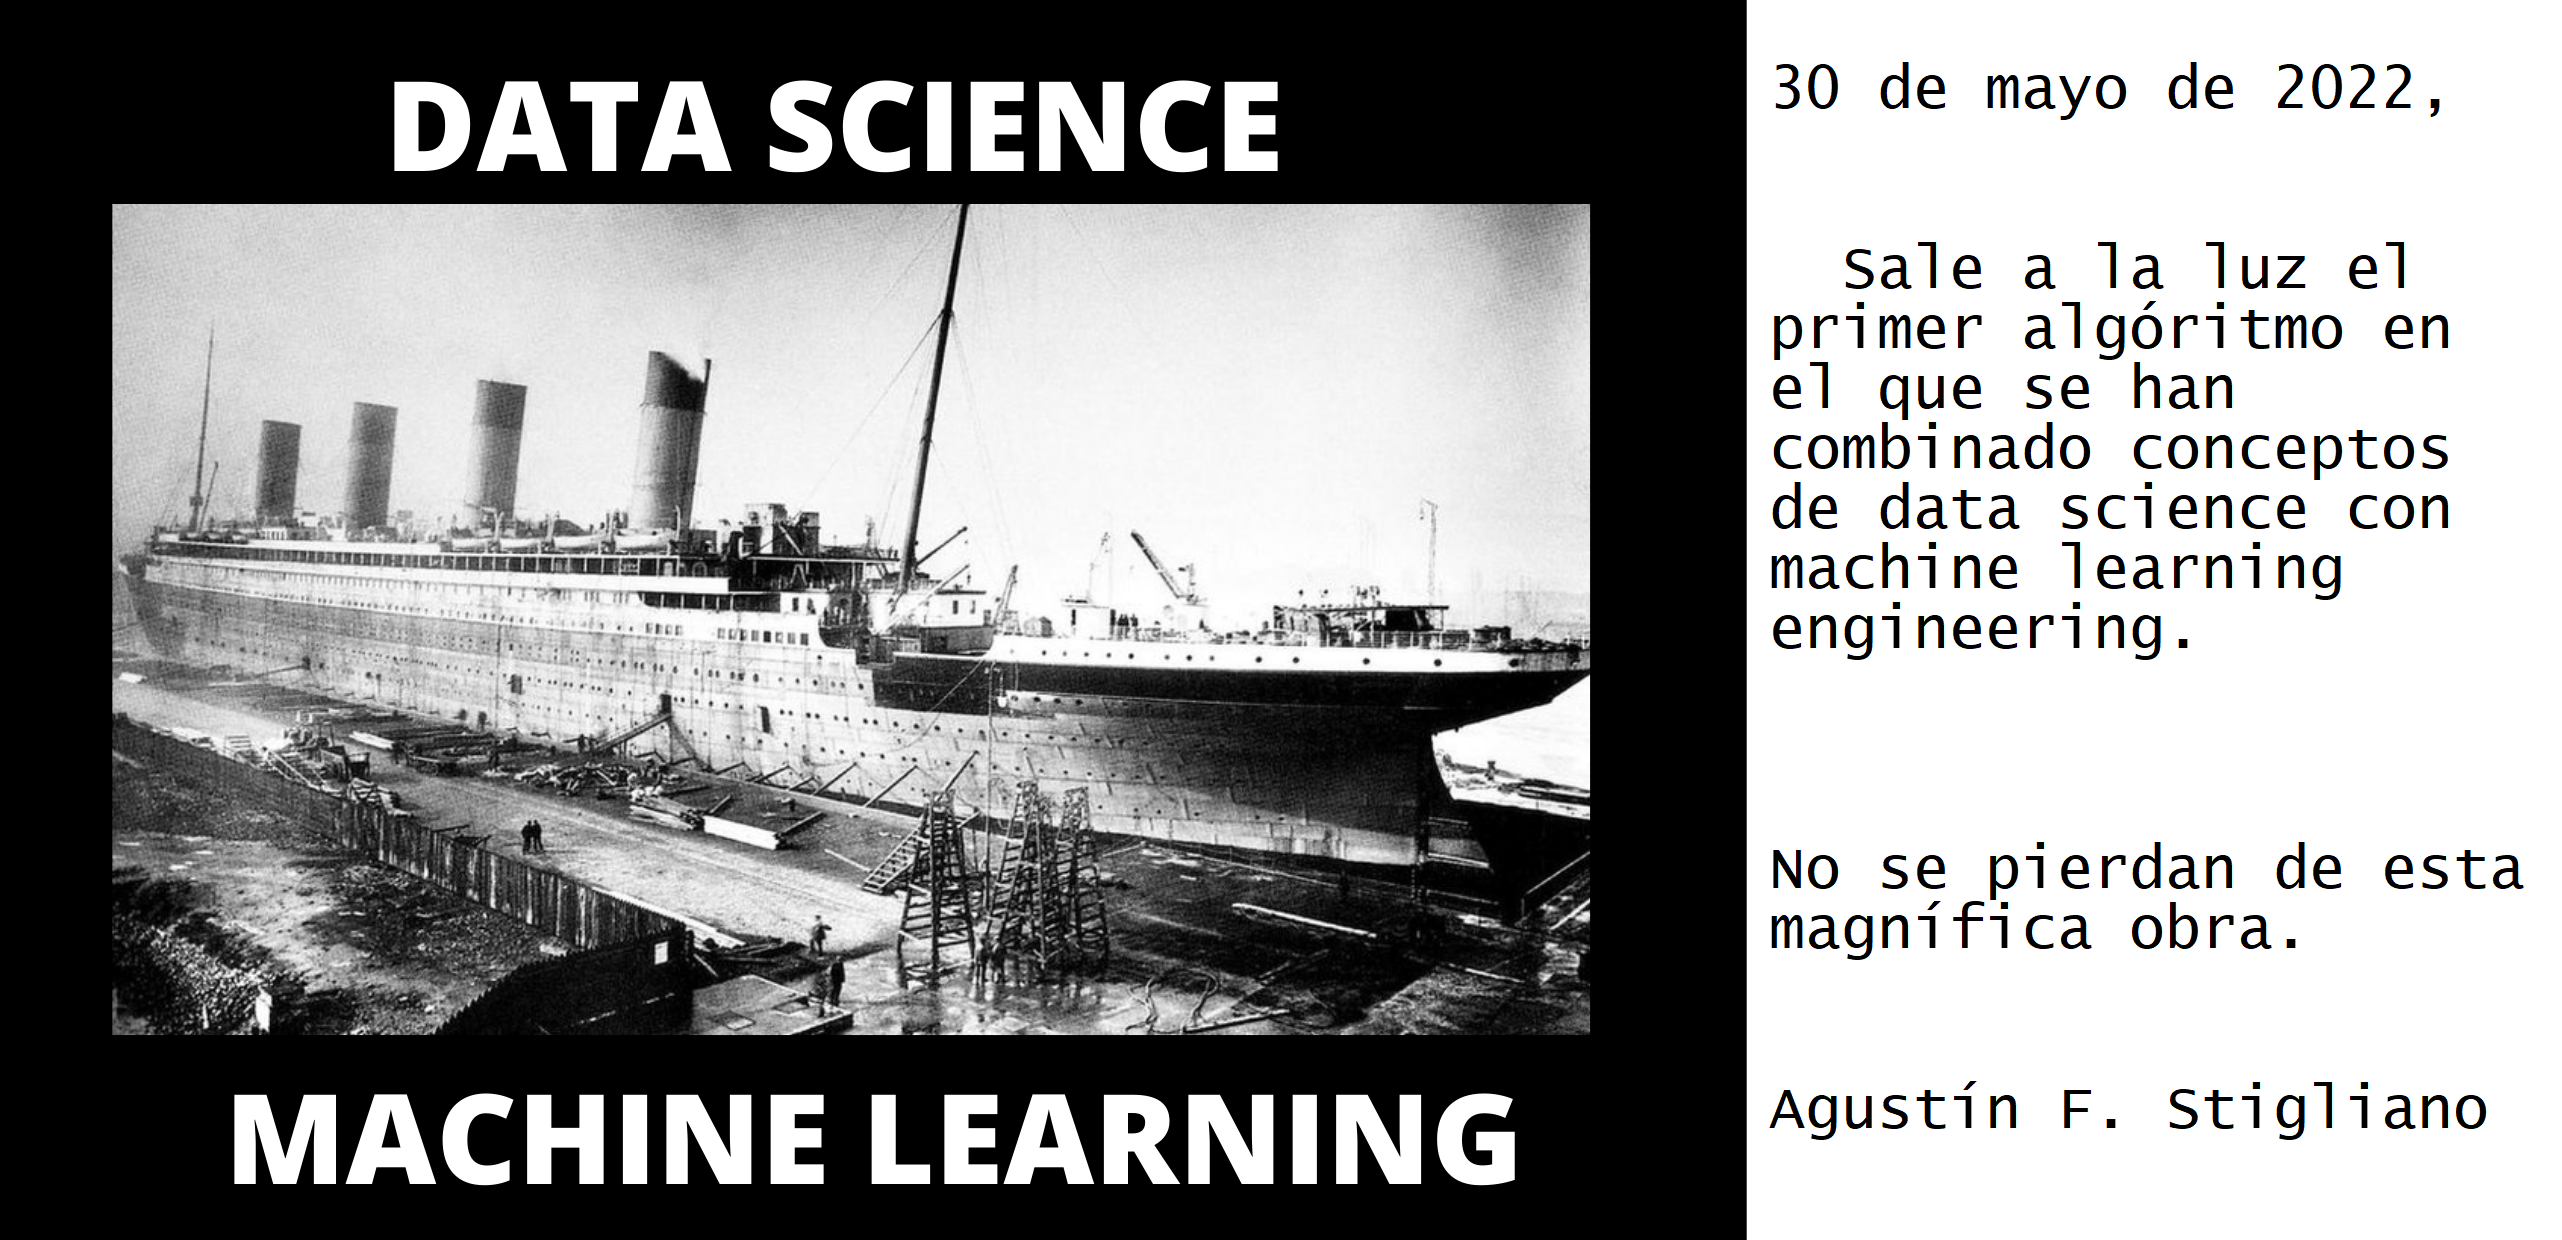

<font face='Arial Narrow'>

-------
    
# LABORATORIO: 

# <u>Pipelines y Transformadores + Arboles de decisión CART + Modelos de ensamble</u>

<br>
    
dataset: [Titanic dataset](http://www.kaggle.com/c/titanic-gettingStarted/data).

<br>

## <u>Introducción</u>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;En este laboratorio vamos a trabajar con el dataset del trasatlántico más famoso. Los datos son una lista de pasajeros que abordaron **El Titanic**. El objetivo es predecir una columna del dataset llamada "Survived", que indica si la persona ha sobrevivido (1) o no (0) al naufragio - variable categórica binaria -.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;El proceso llevado a cabo para dicho objetivo será la implementación técnica de múltiples temas relacionados a **Machine Learning**. La dirección está centrada en poder automatizar la mayor parte de las actividades que ejecutará el código a través de las herramientas vistas de **"Programación orientada a objetos"**. La intensión se basa en que **"los datos se ajusten al modelo, y no el modelo a los datos"** aunque este dataset no vaya a tener actualizaciones en el futuro, por cuestiones didácticas se apunta a eso.</font>

- <font color='DodgerBlue' face='Arial Narrow'>**<u>RESUMEN DEL CODIGO**</u></font>
<font face='Arial Narrow'>
    
    - Aplicar ingeniería en features para el preprocesamiento inicial de los datos 
    - Aplicar ingeniería en features para la obtención de los sets de entrenamiento y testeo
    - Aplicar pipelines para comparar 3 modelos base, sin ajustes, sobre los sets obtenidos y obtener métricas preliminares
    - Aplicar árbol de decisión implementando criterio de parada, y método de poda por medio de los hiperparámetros, y evaluar métricas
    - Aplicar modelo de ensamble de RandomForest con GridSearch para obtener un modelo robusto y evaluar la relevancias de las métricas
    - Aplicar un modelo de ensamble de ADABoost, utilizando como modelo base el mejor de los 3 modelo evaluados al comienzo, habiendolo optimizando anteriormente
    - Implementar XGBoost con el fin de obtener el mejor de todos los modelos
    - Presentación de las conclusiones</font>

<br>

<a id="indice_notebook"></a> 

<font face='Arial Narrow'>

## <u>Indice de la notebook</u>

*(El índice tiene links )*</font>

- [<font color='DodgerBlue' face='Arial Narrow'>**PARTE 1.1: <u>PREPROCESAMIENTO DEL DATASET**</u></font>](#p1)
<font face='Arial Narrow'>
    
    - (1.1) EXPLORACION DATASET  [--> (ACA)](#p1_1)
    - (1.2) ESTUDIO DE LAS VARIABLES [--> (ACA)](#p1_2)
    - (1.3) CONSTRUCCION DE TRANSFORMADORES 1 [--> (ACA)](#p1_3)
    - (1.4) APLICACION DE TRANSFORMADORES 1 [--> (ACA)](#p1_4)</font>


- [<font color='DodgerBlue' face='Arial Narrow'>**PARTE 1.2: <u>FEATURES ENGINEERING, PRIMERAS METRICAS**</u></font>](#p11)
<font face='Arial Narrow'>
    
    - (1.5) CONSTRUCCION DE TRANSFORMADORES 2 [--> (ACA)](#p1_5)
    - (1.6) CREACION DE MODELOS BASE [--> (ACA)](#p1_6)
    - (1.7) DIVISION EN SET DE ENTRENAMIENTO Y EN SET DE TESTEO [--> (ACA)](#p1_7)
    - (1.8) APLICACION DE TRANSFORMADORES 2 Y ENTRENAMIENTO [--> (ACA)](#p1_8)
    - (1.9) RESULTADOS PRELIMINARES [--> (ACA)](#p1_9)</font>


- [<font color='DodgerBlue' face='Arial Narrow'>**PARTE 2: <u>CART: Arboles de Decisión**</u></font>](#p2)
<font face='Arial Narrow'>
    
    - (2.1) INSTANCIACION DE LOS MODELOS [--> (ACA)](#p2_1)
    - (2.2) CRITERIO DE PARADA [--> (ACA)](#p2_2)
    - (2.3) METODO DE PODA [--> (ACA)](#p2_3))</font>


- [<font color='DodgerBlue' face='Arial Narrow'>**PARTE 3: <u>MODELOS DE ENSAMBLE**</u></font>](#p3)
<font face='Arial Narrow'>

    - (3.1) RANDOM FOREST [--> (ACA)](#p3_1)
    - (3.2) ADA BOOST [--> (ACA)](#p3_2)
    - (3.3) XGBOOST [--> (ACA)](#p3_3)</font>


- [<font color='DodgerBlue' face='Arial Narrow'>**PARTE 4: <u>CONCLUSIONES**</u></font>](#p4)
<font face='Arial Narrow'>

    - (4.1) CONCLUSIONES [--> (ACA)](#conclusiones)
    - (4.2) PROXIMAS ACTUALIZACIONES [--> (ACA)](#conclusiones)
    - (4.3) AGRADECIMIENTOS [--> (ACA)](#conclusiones)
    
<br><br>

PASEMOS AL CODIGO:</font>

In [1]:
from SmartPandas import PandasTransform, PandasFeatureUnion, data_info, FeatureSelection, FeatureEncoder

In [2]:
# Importar librerias básicas, cargar dataset y mostrarlo.

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
X_test, y_test = 0, 0
def metrics(model, model_selection, extra=False):
    global X_test, y_test
    
    if isinstance(model, sklearn.model_selection._search.GridSearchCV ):
        
        print ('\tMETRICS AND ANALYSIS: for "{}"'.format(model_selection))
        print ('='*75,'\n')
        if extra: print ('CLASS WE ARE WORKING WITH\n{}\n'.format(type(model.best_estimator_)))
        
        print ('IMPLEMENTED MODEL')
        print (model.best_estimator_.named_steps[model_selection])
        print ()
        if extra:
            print ('PIPELINE STEP ILUSTRATION')
            display (model.best_params_)
            print ()

            print ('ADJUSTED HYPERPARAMETERS')
            display (model.best_estimator_.named_steps[model_selection].get_params())
            print ()

        print ('COMPUTED METRICS')
        print ('best score: {}'.format(model.best_score_))
        print ('test score: {}'.format(model.score(X_test, y_test)))
        print ()
        print ('COMPARISON')
        print ('Proporción de labels predichas en test:\n{}\n'.format(pd.Series(model.predict(X_test)).value_counts(normalize=True).to_string()))
        
    else:
        print ('Still working')

<a id='p1'></a>

-----
-----

<font face='Arial Narrow'>
    
# PARTE 1.1: <u>PREPROCESAMIENTO DEL DATASET</u>

- SECCIONES:
    - (1.1) EXPLORACION DATASET  [--> (ACA)](#p1_1)
    - (1.2) ESTUDIO DE LAS VARIABLES [--> (ACA)](#p1_2)
    - (1.3) CONSTRUCCION DE TRANSFORMADORES 1 [--> (ACA)](#p1_3)
    - (1.4) APLICACION DE TRANSFORMADORES 1 [--> (ACA)](#p1_4)</font>

<br>

[VOLVER AL INICIO](#indice_notebook)

<a id='p1_1'></a>

----------------
<font face='Arial Narrow'>

### --> (1.1) EXPLORACION DATASET
[back](#p1)</font>

In [4]:
data = pd.read_csv('Data/Titanic.csv');Dicto ={'data':data.to_dict()}
print(f'Dataset Head: shape = {data.shape}')
display (data.head(4))
print ('\n data_info():')
df = data_info(data)
display (df)

Dataset Head: shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S



 data_info():


info de data,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,Survived,0,0.00,int64,891,100.00,2
1,Pclass,0,0.00,int64,891,100.00,3
2,SibSp,0,0.00,int64,891,100.00,7
3,Parch,0,0.00,int64,891,100.00,7
4,PassengerId,0,0.00,int64,891,100.00,891
5,Age,177,19.87,float64,714,80.13,88
6,Fare,0,0.00,float64,891,100.00,248
7,Sex,0,0.00,object,891,100.00,2
8,Embarked,2,0.22,object,889,99.78,3
9,Cabin,687,77.10,object,204,22.90,147


<a id='p1_2'></a>

----------------
<font face='Arial Narrow'>

### --> (1.2) ESTUDIO DE LAS VARIABLES
[back](#p1)

Vemos que tenemos:

<u> Variables int64 </u> = 5

- Survived: "target" - Binario: 1 = sobrevivió - 0 : no sobrevivió
- Pclass: Categórica o incluso puede considerarse Ordinal - Tiene que ver con si el boleto es de primera clase, segunda clase o tercera clase socioeconómica.
- SibSp: Cantidad de Hermanos y cónyuges a bordo
- Parch: Cantidad de padres o hijos a bordo
- PassengerId: irrelevante

<u> Variables float64 </u> = 2

- Age: Edad. Tiene el 20% de registros faltantes
- Fare: Tarifa. Cuánto costó el ticket

<u> Variables object </u> = 5

- Sex: Género - Binario: male - female
- Embarked: Categórica
- Cabin: irrelevante
- Ticket: irrelevante
- Name: irrelevante

Aclaro que algunas irrelevancias las considero sólo para todos los fines prácticos del desarrollo técnico del laboratorio.</font>

In [5]:
# Proporción de la variable target
print ('Proporción de registros target:\n{}'.format((data['Survived'].value_counts(normalize = True) *100).round(2).to_string()))
print ('-'*25)

# Quitemos los valores Age que sean nulos y veamos si se modifica la proporción
mask = data.Age.notna()
print ('Proporción de registros target sin NaNs(Age):\n{}'.format((data.loc[mask,'Survived'].value_counts(normalize = True) *100).round(2).to_string()))

Proporción de registros target:
0    61.62
1    38.38
-------------------------
Proporción de registros target sin NaNs(Age):
0    59.38
1    40.62


In [6]:
# Aplicando la máscara vemos que otros nulos nos quedan
data_info(data[mask])[data_info(data[mask])['pct_nan'] != 0]

info de data,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
8,Embarked,2,0.28,object,712,99.72,3
9,Cabin,529,74.09,object,185,25.91,134


Hay una diferencia de 2,2% en la proporción de targets cuando quitamos los NaNs de "Age". No es significativa, pero tampoco irrelevante. Para los fines prácticos del desarrollo se la considera irrelevante.

"Cabin" la consideramos irrelevante por lo que la columna entera se despeja de la matriz de trabajo.

"Embarked" vamos a completar los datos faltantes con la moda del set de datos

<a id='p1_3'></a>

----------------
<font face='Arial Narrow'>

### --> (1.3) CONSTRUCCION DE TRANSFORMADORES 1: Imputacion

[back](#p1)

Observamos que el preprocesamiento de los datos requiere distintos enfoques para distintos tipos de columnas: algunas requieren imputación, otras requieren generar variables Dummies y otras sería conveniente estandarizarlas.

EL objetivo de estos primeros transformadores es la de **imputacion**, que se hará sobre **"Age"** el criterio es eliminar NaNs, y en **"Embarked"** al ser pocos, optaremos por el criterio de completar por la moda.

    
- TRANSOFRMADORES
    - get_matrix: Descarta las columnas irrelevantes o que se incorporaran en otro step
    - clean_columns: seleccionar una o más columnas para limpiar NaNs
    - fill_column_mode: imputar con la moda una columna determinada</font>

In [7]:
# step_1
irrelevant_names = ['PassengerId', 'Cabin', 'Ticket', 'Name']
processed_apart = ['Embarked']
keep_it_columns = data.columns.drop(irrelevant_names + processed_apart)

get_matrix = PandasTransform(lambda X: X.loc[:, keep_it_columns])

## step 1_2
clean_wich_columns = ['Age']

clean_columns = PandasTransform(lambda X: X.loc[X[clean_wich_columns].notna().all(axis=1)])

## step 2
wich_mode_apply = 'Embarked'
mode_apply = lambda X: X[wich_mode_apply]

fill_columns_mode = PandasTransform(lambda X: X[wich_mode_apply].fillna(X.apply(mode_apply ,axis=1).mode()[0]))

<a id='p1_4'></a>

----------------
<font face='Arial Narrow'>
    
### --> (1.4) APLICACION DE TRANSFORMADORES 1:

Ahora vamos a crear un "PandasFeatureUnion" de "SmartPandas", llamado **set_conf_1** y cuyo fiteo nos devolverá el primer conjunto de variables que procesaremos.
    
[back](#p1)</font>

In [8]:
set_config_1 = PandasFeatureUnion([
    ('step_1', make_pipeline(get_matrix, clean_columns)),
    ('step_2', make_pipeline(fill_columns_mode))
])


target_name = 'Survived'
X = set_config_1.fit_transform(data).drop(columns=target_name).dropna()
y = set_config_1.fit_transform(data)[target_name].dropna()


print (f'X head: shape = {X.shape}')
display (X.head(4))

print ('\ndata_info(X):')
display(data_info(X,'X'))

print (f'\ny head: shape = {y.shape}')
display (y.head(4))

X head: shape = (714, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,female,38.0,1.0,0.0,71.2833,C
2,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,female,35.0,1.0,0.0,53.1000,S



data_info(X):


info de X,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,Pclass,0,0.0,float64,714,100.0,3
1,SibSp,0,0.0,float64,714,100.0,6
2,Parch,0,0.0,float64,714,100.0,7
3,Age,0,0.0,float64,714,100.0,88
4,Fare,0,0.0,float64,714,100.0,220
5,Sex,0,0.0,object,714,100.0,2
6,Embarked,0,0.0,object,714,100.0,3



y head: shape = (714,)


0    0.0
1    1.0
2    1.0
3    1.0
Name: Survived, dtype: float64

<a id='p11'></a>

-----
-----
<font face='Arial Narrow'>
    
# PARTE 1.2: <u>FEATURES ENGINEERING, PRIMERAS MÉTRICAS</u>

- SECCIONES:

    - (1.5) CONSTRUCCION DE TRANSFORMADORES 2 [--> (ACA)](#p1_5)
    - (1.6) CREACION DE MODELOS BASE [--> (ACA)](#p1_6)
    - (1.7) DIVISION EN SET DE ENTRENAMIENTO Y EN SET DE TESTEO [--> (ACA)](#p1_7)
    - (1.8) APLICACION DE TRANSFORMADORES 2 Y ENTRENAMIENTO [--> (ACA)](#p1_8)
    - (1.9) RESULTADOS PRELIMINARES [--> (ACA)](#p1_9)</font>
    
<br>

[VOLVER AL INICIO](#indice_notebook)

<a id='p1_5'></a>

----
<font face='Arial Narrow'>

### --> (1.5) CONSTRUCCION DE TRANSFORMADORES 2: categorización y preprocesamiento
[back](#p11)

"Sex", "Embarked" y "Pclass" son variables categóricas. Vamos a crear los steps correspondientes para hacerlas variable dummy.


- TRANSOFRMADORES:
    - categorizador_dummy</font>

In [9]:
# Primer set de variables a entrenar

categorizador_dummy = PandasTransform(lambda X: pd.get_dummies(X, columns=X.columns, drop_first=True))

features_1 = ['Pclass', 'Sex','Embarked']
features_11 = X.columns.drop(features_1)

feature_engineering_1 = PandasFeatureUnion([
    ('categorizacion', make_pipeline(FeatureSelection(features_1), categorizador_dummy)),
    ('incorporacion', make_pipeline(FeatureSelection(features_11)))
])

<a id='p1_6'></a>

----
<font face='Arial Narrow'>

### --> (1.6) CREACION DE LOS MODELOS BASE: Modelos base de prueba inicial

[back](#p11)

- MODELOS:
    - LogisticRegression
    - GaussianNB
    - DecisionTreeClassifier</font>

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold

In [11]:
cl1 = LogisticRegression(max_iter=250)
cl2 = GaussianNB()
cl3 = DecisionTreeClassifier()

<a id='p1_7'></a>

----
<font face='Arial Narrow'>

### --> (1.7) DIVISION EN SET DE TRAIN Y DE TEST

[back](#p11)</font>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=90)

k_fold = StratifiedKFold(n_splits=3, shuffle=True)

In [13]:
print ('X_train head:')
display (feature_engineering_1.transform(X_train).head(4))
print ('\nX_train info:')
display (data_info(feature_engineering_1.transform(X_train), 'X_train'))
print ('\ny: Binarized Categorical Vector')

X_train head:


,Pclass_2.0,Pclass_3.0,Sex_male,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
281,0,1,1,0,1,28.0,0.0,0.0,7.8542
171,0,1,1,1,0,4.0,4.0,1.0,29.1250
208,0,1,0,1,0,16.0,0.0,0.0,7.7500
239,1,0,1,0,1,33.0,0.0,0.0,12.2750



X_train info:


info de X_train,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,Pclass_2.0,0,0.0,uint8,478,100.0,2
1,Pclass_3.0,0,0.0,uint8,478,100.0,2
2,Sex_male,0,0.0,uint8,478,100.0,2
3,Embarked_Q,0,0.0,uint8,478,100.0,2
4,Embarked_S,0,0.0,uint8,478,100.0,2
5,SibSp,0,0.0,float64,478,100.0,6
6,Parch,0,0.0,float64,478,100.0,7
7,Age,0,0.0,float64,478,100.0,83
8,Fare,0,0.0,float64,478,100.0,186



y: Binarized Categorical Vector


In [14]:
#Backup storage for developing
Dicto['X_train'] = X_train.to_dict(); Dicto['X_test'] = X_test.to_dict()
Dicto['y_train'] = y_train.to_dict(); Dicto['y_test'] = y_test.to_dict()

<a id='p1_8'></a>

-------------
<font face='Arial Narrow'>

### --> (1.8) APLICACION DE TRANSFORMADORES 2 Y ENTENAMIENTO: Pipelines + GridSearch
[back](#p11)</font>

In [15]:
pasos = [('feature_engineering', feature_engineering_1),
             ('preprocesamiento', None),
             ('model_selection', cl2)
             ]

pipeline = Pipeline(pasos)    


param_grid = [{
    'preprocesamiento': [StandardScaler(), MaxAbsScaler(), None],
    'model_selection': [cl1, cl2, cl3]
              }]

ensemble_grid_models = GridSearchCV(pipeline, param_grid).fit(X_train, y_train);


<a id='p1_9'></a>

-------------
<font face='Arial Narrow'>
    
### --> (1.9) RESULTADOS PRELIMINARES

[back](#p11)</font>

In [16]:
metrics(ensemble_grid_models, 'model_selection', extra=False)

	METRICS AND ANALYSIS: for "model_selection"

IMPLEMENTED MODEL
LogisticRegression(max_iter=250)

COMPUTED METRICS
best score: 0.8075438596491228
test score: 0.7838983050847458

COMPARISON
Proporción de labels predichas en test:
0.0    0.614407
1.0    0.385593



<a id='p2'></a>

-----
-----

<font face='Arial Narrow'>

# PARTE 2: <u>CART: Arboles de decisión</u>

**Los árboles de decisión son un método de aprendizaje supervisado no paramétrico.**

El objetivo es crear un modelo predictivo que aprenda por medio de toma de decisiones sencillas. El **modelo CART** divide cada nodo en dos hojas. Es el modelo de árbol con mayor implementación en el campo de la **data science**.

Partiremos con **dos modelos base** que serán procesados dentro de un **pipeline**, y luego de aplicar **Grid-Search** nos quedaremos con el **mejor estimador** entre ambos.

A partir de ahí optimizaremos ese modelo, por medio de una serie de Grid-Searches. 
    
- La secuencia de optimización consta de:
    - El criterio de parada o **stopping criteria**: hay de 2 tipos, hard-stopping o loose-stopping, en este caso utilizamos el primero de ellos, asi que **Grid-Search** limitará entre 4 o 5 unidades de profunidad las decisiones que tome el árbol.

    - El **método de prunning**, lo cual aplicamos poda, apuntamos a ganar interpretabilidad en el modelo, es más sencillo de leer, de interpretar visualmente.</font>

<br>
<font face='Arial Narrow'>
    
- SECCIONES    
    - (2.1) INSTANCIACION DE LOS MODELOS [--> (ACA)](#p2_1)
    - (2.2) CRITERIO DE PARADA [--> (ACA)](#p2_2)
    - (2.3) METODO DE PODA [--> (ACA)](#p2_3)</font>

<br>

[VOLER AL INDICE](#indice_notebook)

<a id='p2_1'></a>

---
<font face='Arial Narrow'>

### --> (2.1) Instanciación de los modelos

[back](#p2)</font>

In [17]:
from sklearn import tree

In [18]:
cl4 = tree.DecisionTreeClassifier()
cl5 = tree.ExtraTreeClassifier()

In [19]:
## "root_tree" es nuestro pipeline de base, se transforma en "grown_tree" y luego en "pruned_tree"

root_tree = Pipeline([('feature_engineering', feature_engineering_1),
                      ('preprocesamiento', None),
                      ('root_model', cl4)
                     ])

param_grid = [{'preprocesamiento': [StandardScaler(), MaxAbsScaler(), None],
               'root_model': [cl4, cl5]
              }]

root_tree = GridSearchCV(root_tree, param_grid).fit(X_train, y_train)

metrics(root_tree, 'root_model')

	METRICS AND ANALYSIS: for "root_model"

IMPLEMENTED MODEL
ExtraTreeClassifier()

COMPUTED METRICS
best score: 0.7677850877192983
test score: 0.75

COMPARISON
Proporción de labels predichas en test:
0.0    0.588983
1.0    0.411017



<a id='p2_2'></a>

-----
<font face='Arial Narrow'>

### --> (2.2) STOPPING CRITERIA - CRITERIO DE PARADA

Hard-stop.
    
Ahora que root_tree es un grid_search_fiteado, el root tree es un pipeline con parámetros actualizados

[back](#p2)</font>

In [20]:
stopping_criteria = {'root_model__criterion': ['gini', 'entropy'],
                    'root_model__class_weight': ['balanced', None],
                    'root_model__max_depth': np.arange(2,4),# hard-stop
                    'root_model__min_samples_split': np.arange(3,12,2),
                    'root_model__min_samples_leaf': [7, 8, 9, 10, 11]
                    }


grown_tree = GridSearchCV(root_tree.best_estimator_, stopping_criteria, cv=k_fold).fit(X_train, y_train)#, scoring='neg_mean_squared_error')

metrics(grown_tree, 'root_model')

	METRICS AND ANALYSIS: for "root_model"

IMPLEMENTED MODEL
ExtraTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=10,
                    min_samples_split=3)

COMPUTED METRICS
best score: 0.8159329140461216
test score: 0.7033898305084746

COMPARISON
Proporción de labels predichas en test:
0.0    0.525424
1.0    0.474576



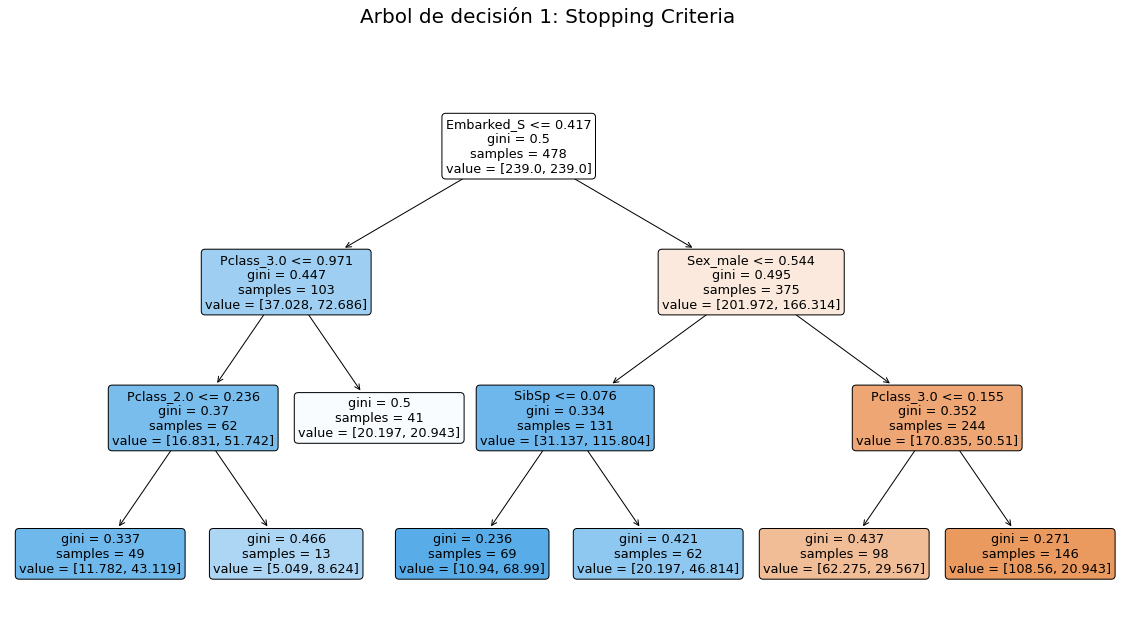

In [21]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Arbol de decisión 1: Stopping Criteria',size=20)
tree.plot_tree(grown_tree.best_estimator_.named_steps['root_model'], feature_names=feature_engineering_1.fit_transform(X_train).columns , filled=True, rounded=True);

<a id='p2_3'></a>

----
<font face='Arial Narrow'>

### --> (2.3) Metodo de poda

[back](#p2)</font>

In [22]:
pruning_method = {'root_model__ccp_alpha': [0.0, 0.01, 0.1, None],
                 'root_model__min_impurity_decrease': [0.0, 0.01, 0.1, None],
                 'root_model__min_weight_fraction_leaf': [0.0, 0.01, 0.1, None]
                 }

pruned_tree = GridSearchCV(grown_tree.best_estimator_, pruning_method, cv=k_fold).fit(X_train, y_train)

metrics(pruned_tree, 'root_model')

	METRICS AND ANALYSIS: for "root_model"

IMPLEMENTED MODEL
ExtraTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=10,
                    min_samples_split=3, min_weight_fraction_leaf=0.01)

COMPUTED METRICS
best score: 0.8011923480083857
test score: 0.7584745762711864

COMPARISON
Proporción de labels predichas en test:
0.0    0.639831
1.0    0.360169



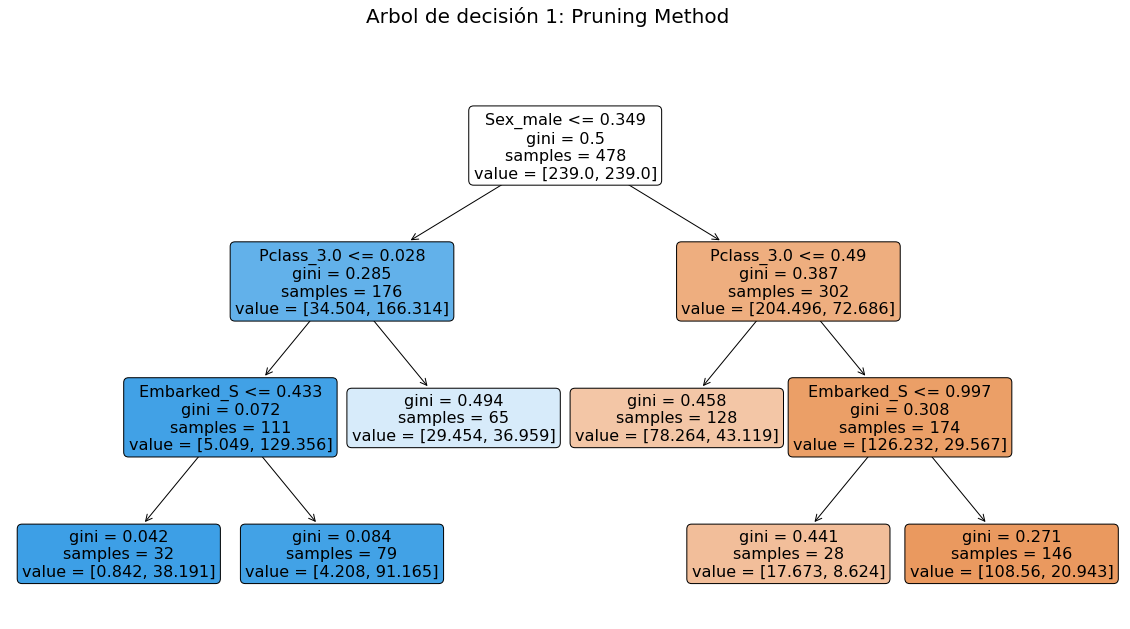

In [23]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Arbol de decisión 1: Pruning Method',size=20)
tree.plot_tree(pruned_tree.best_estimator_.named_steps['root_model'], feature_names=feature_engineering_1.fit_transform(X_train).columns , filled=True, rounded=True);

<a id='p3'></a>

<br><br>

----
----
<font face='Arial Narrow'>

# PARTE 3: <u>ENSAMBLE DE MODELOS</u>

<br>
    
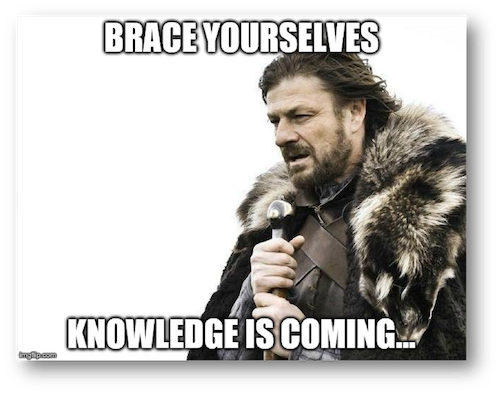
    
<br>
    
- SECCIONES
    - (3.1) RANDOM FOREST [--> (ACA)](#p3_1)
    - (3.2) ADA BOOST [--> (ACA)](#p3_2)
    - (3.3) XGBOOST [--> (ACA)](#p3_3)

<br>
    
[VOLVER AL INDICE](#indice_notebook)</font>

<a id='p3_1'></a>

----
<font face='Arial Narrow'>

### --> (3.1) RANDOM FOREST

[back](#p3)</font>

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
random_forest = Pipeline([('feature_engineering', feature_engineering_1),
                          ('preprocessing', None),
                          ('random_forest', RandomForestClassifier(oob_score= True))
                        ])

param_grid = [{'preprocessing': [StandardScaler(), MinMaxScaler(), None],
               'random_forest__ccp_alpha': [0.0,  0.01, 0.02],
               'random_forest__bootstrap': [True, False],               
               'random_forest__criterion': ["gini", "entropy"]
              }]

random_forest = GridSearchCV(random_forest, param_grid, cv=k_fold).fit(X_train, y_train)

metrics(random_forest,'random_forest')

	METRICS AND ANALYSIS: for "random_forest"

IMPLEMENTED MODEL
RandomForestClassifier(ccp_alpha=0.01, oob_score=True)

COMPUTED METRICS
best score: 0.8285508385744235
test score: 0.7838983050847458

COMPARISON
Proporción de labels predichas en test:
0.0    0.716102
1.0    0.283898



<a id='p3_2'></a>

----
<font face='Arial Narrow'>

### --> (3.2) ADA BOOST: LinearRegressor as model base

[back](#p3)</font>

In [26]:
from sklearn.ensemble import AdaBoostClassifier

<font face='Arial Narrow'>

#### --> (3.2.1) Optimización del mejor modelo base PARTE 1</font>

In [27]:
base_classifier = LogisticRegression(max_iter=250)

base_optimized = Pipeline([('feature_engineering', feature_engineering_1),
                           ('preprocessing', None),
                           ('logistic', base_classifier)
                          ])

param_grid = [{'preprocessing': [StandardScaler(), MaxAbsScaler(), None],
               'logistic__C': [None, 0.0001, 0.001, 0.01, 0.1, 1],
               'logistic__tol': [10**-(i+1) for i in range(4)] + [None],
               'logistic__class_weight': [None, 'balanced']
              }]    

base_optimized = GridSearchCV(base_optimized, param_grid, cv=k_fold).fit(X_train, y_train)

metrics(base_optimized, 'logistic')

	METRICS AND ANALYSIS: for "logistic"

IMPLEMENTED MODEL
LogisticRegression(C=0.01, max_iter=250, tol=0.1)

COMPUTED METRICS
best score: 0.8160115303983227
test score: 0.7627118644067796

COMPARISON
Proporción de labels predichas en test:
0.0    0.720339
1.0    0.279661



<font face='Arial Narrow'>

#### --> (3.2.2) Implementación de modelo de ensamble</font>

In [28]:
#adaboost_base = AdaBoostClassifier(base_estimator = base_optimized.best_estimator_.named_steps['logistic'])
adaboost_base = AdaBoostClassifier(base_estimator = base_classifier)
                                  

adaboost_model = Pipeline([('feature_engineering', feature_engineering_1),
                           ('preprocessing', None),
                           ('adaboost', adaboost_base)
                          ])

param_grid = [{'preprocessing': [MaxAbsScaler(), None],
               'adaboost__base_estimator__C': [0.1, None],
#               'adaboost__learning_rate' : [0.05 + i*0.2 for i in range(5)] + [None],
               'adaboost__n_estimators' : [None, 100],
#               'adaboost__base_estimator__tol': [10**-(i+1) for i in range(4)] + [None],
               'adaboost__base_estimator__class_weight': [None, 'balanced']
            }]


adaboost_model = GridSearchCV(adaboost_model, param_grid, cv=k_fold).fit(X_train, y_train);

metrics(adaboost_model, 'adaboost')

	METRICS AND ANALYSIS: for "adaboost"

IMPLEMENTED MODEL
AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1, max_iter=250),
                   n_estimators=100)

COMPUTED METRICS
best score: 0.8158805031446542
test score: 0.7669491525423728

COMPARISON
Proporción de labels predichas en test:
0.0    0.741525
1.0    0.258475



<a id='p3_3'></a>

----
<font face='Arial Narrow'>

### --> (3.3) XGBOOST
    
[back](#p3)</font>

In [29]:
import xgboost as xgb
import scipy

In [30]:
# Feature Engineering XGBoost
feature_engineering_2 = Pipeline([('step_1', feature_engineering_1),
                                  ('preprocessing', None)
                                 ])

# Creación del set de entrenamiento y testeo
dtrain = feature_engineering_2.fit_transform(pd.DataFrame(Dicto['X_train']))
dtest = feature_engineering_2.fit_transform(pd.DataFrame(Dicto['X_test']))


# Creación de las matrices train and test set
dtrain = xgb.DMatrix(dtrain, label=y_train)
dtest = xgb.DMatrix(dtest, label=y_test)

# Creación del diccionario de parámetros
param = {'max_depth':3, 'eta':1, 'objective':'binary:logistic', 'eval_metric': 'error'}#, use_label_encoder=False, eval_metric=['auc', 'logloss', 'error', 'error@0.6'])

# Creación de la lista de sets y diccionario de métricas
evallist = [(dtest, 'eval'), (dtrain, 'train')]
evals_result = {}

# Creación de la plataforma de fiteo
print ('\n', '='*30, 'XGBoost Training Data', '='*30)
num_round = 2
bst = xgb.train(param, dtrain, num_round, evals=evallist, early_stopping_rounds=10, evals_result=evals_result)

# Obtención de predicciones
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
ypred_train = bst.predict(dtrain, ntree_limit=bst.best_ntree_limit)

threshold = 0.5

ypred_train_labels = np.where(ypred_train<=threshold, 0, 1)
ypred_labels = np.where(ypred<=threshold, 0, 1)# la consulta: entre 0.5 y 0.29 de umbral, el score no varía

# Obtención de los scores de comparación
#best_score_mean = 1- np.mean(evals_result['train']['error'])
#test_score_mean = 1 - np.mean(evals_result['eval']['error'])

best_score = sklearn.metrics.accuracy_score(y_train, ypred_train_labels)
test_score =sklearn.metrics.accuracy_score(y_test, ypred_labels)

# Imprimir los resultados
print ('\n', '='*30, 'XGBoost Average Scores', '='*30)
print (f'best_score: \n {best_score}')
print (f'test_score: \n {test_score}')


 ============================== XGBoost Training Data ==============================
[0]	eval-error:0.23305	train-error:0.16736
[1]	eval-error:0.19068	train-error:0.16109

 ============================== XGBoost Average Scores ==============================
best_score: 
 0.8389121338912134
test_score: 
 0.809322033898305


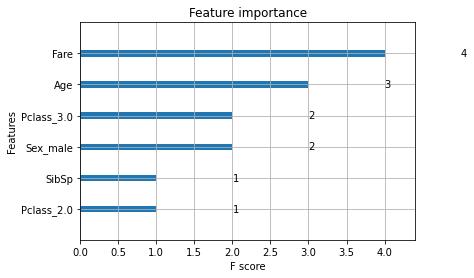

In [31]:
xgb.plot_importance(bst);

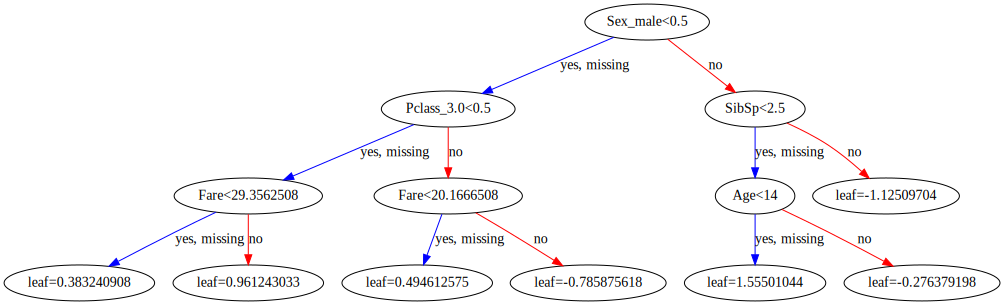

<Figure size 1440x720 with 0 Axes>

In [32]:
plt.figure(figsize=(20,10))
xgb.to_graphviz(bst, num_trees=1)

<a id='p4'></a>

----
----
<font face='Arial Narrow'>

# PARTE 4: <u>CONCLUSIONES</u>

 
    
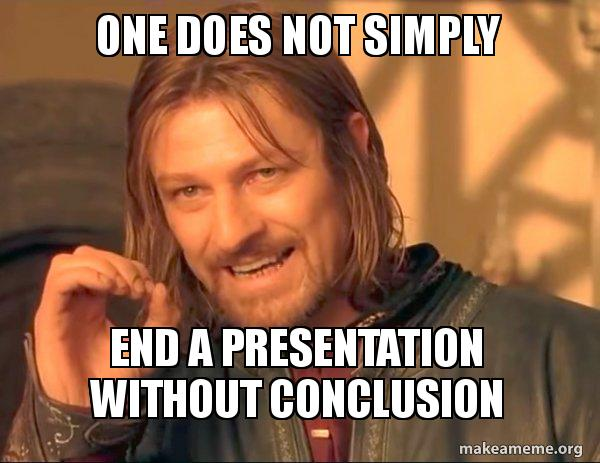  
    
<br><br>
</font>

<font face='Arial Narrow'>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;La visión con la que estuvo encarado este trabajo fue la de poder tener multiples features de entrenamiento, tener multiples modelos de ensamble y poseer una métrica en común para evaluar; ya que si fuese necesario, se podría armar un modelo de ensamble, para que las decisiones finales se hagan por votación de algunos de los 8 modelos recién vistos.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;En la tabla que van a ver a continuación, están los "scores" durante una pasada de **5** corridas del código. La métrica para evaluar los modelos es la **exactitud** de las predicciones. Esa métrica representa la proporción de casos correctamente predichos, sobre el total de casos analizados. Se pueden ver los scores para "Train" y para "Eval" por cada corrida, siempre predomina el modelo que tenga mejor score en Eval. 
    

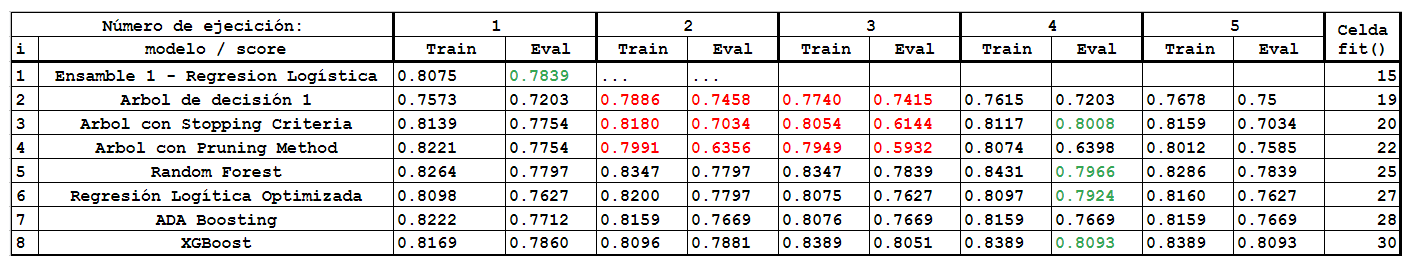
    
</font>    

<a id='conclusiones'></a>

- <font color='DodgerBlue' face='Arial Narrow'>**-->(4.1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>CONCLUSIONES**</u></font>
<font face='Arial Narrow'>    

    - La proporción de la variable target es de 40/60, cualquier score mayor a 0.6 es un modelo que predice mejor que responder siempre con la opción más probable.

    - Ensamble 1: en la parte 1 armamos un ensamble de 3 modelos, y el mejor siempre fue regresión logística, con un score inicial de 0,78 y marcando un piso a superar el resto de los modelos.
    
    - Arboles: Aplicamos todos los pasos posibles para obtener un modelo superador, pero muchas veces nos encontramos con que se producía overfitting, y cuando nuestro modelo predecia mejor en "Test", perdiamos mucho socre en "Eval" (en color rojo). Dentro de las corridas obtuvimos un modelo superior en la etapa de "stopping" (en color verde).
    
    - Random Forest: Muy superior en los score de "Train", y respecto a "Eval" hubo mejorías respecto al modelo base, no significativas, pero si representativas mejorías.
    
    - Regresión Logística Optimizado: Hubo que realizarse ajustes manuales a la búsqueda de hiperparámetros, logró superar al modelo base.
    
    - ADA Boosting: Una total decepción no haber podido entrenar acordemente un modelo de ensamble potenciado con regresión logística de modelo base.
    
    - XGBoost: Sorprendido de este modelo. Es superior en score al resto, pero además una facilidad para ajustar sus hiperparámetros. Cero variabilidad en sus entrenamientos sucesivos, velocisimo, etc. Traza la diferencia con la mayoría de los otros modelos. Es el ganador.</font>

    
- <font color='DodgerBlue' face='Arial Narrow'>**-->(4.2)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>PROXIMAS ACTUALIZACIONES**</u></font>    
<font face='Arial Narrow'>
    
    - Prometo aprender a implementar LightGBM, me interesan estos modelos que tienen su propia librería y funcionan con matrices dispersas en vez de DataFrames.
    
    - Prometo aprendar a usar la libreria "pickle", para poder almacenar modelos que entrene, cosa de poder seleccionar los mejores luego de una serie de corridas como he hecho en este caso y no quedarme solamente con último.</font>


- <font color='DodgerBlue' face='Arial Narrow'>**-->(4.3)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>AGRADECIMIENTOS**</u></font>    
<font face='Arial Narrow'>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Para todos aquellos que estén leyendo esta línea de código, ya que fuiste parte de la inspiración que me llevó a querer aprender lenguaje HTML para poder poner hipervínculos para el índice y dentro del código. También y muy importante el hecho de querer hacer un código sintético, para una lectura ágil, entendible para cualquier público, fue la razón por la que gran parte del código que hace posible esta ejecución está en el archivo "SmartPandas.py". El comienzo de una gran carrera está teniendo lugar a partir de estas líneas, y sentir que puedo compartirlo con ustedes es de gran soporte, así que gracias a vos yo seguiré esforzandome. El desafío más importante del siglo XXI es la sustentabilidad.</font>
    
<br>    
    
[VOLVER AL INDICE](#indice_notebook)    